# Bike Sharing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bike_dict = '''
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered'''

In [3]:
print(bike_dict)


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [4]:
bike = pd.read_csv('data/day.csv', index_col=0)
bike.index.name = 'No.'
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
No.,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
print(bike_dict)


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [6]:
bike.shape

(730, 15)

In [7]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [9]:
#Lets convert some columns as object
bike['season'] = bike['season'].astype(object)
bike['weekday'] = bike['weekday'].astype(object)
bike['weathersit'] = bike['weathersit'].astype(object)
bike['season'] = bike['season'].astype(object)

<hr>

__NOTE:__ 

Since there are 2 vairables that sums up and make the total count, i.e. Casual users and registerd users.
Thus, i'll vizualise these two variables seperately.

Creating new datasets for casual, registered and total count of users

In [10]:
# Casual users
bike_cas = bike.drop(['registered', 'cnt'], axis=1) 

# Registered Users
bike_reg = bike.drop(['casual', 'cnt'], axis=1)

# Total users
bike_cnt = bike.drop(['casual', 'registered'], axis=1)

## Data Visualisation

 Visualizing data for casual, registered and total count of users seperately

#### 1. Casual Users

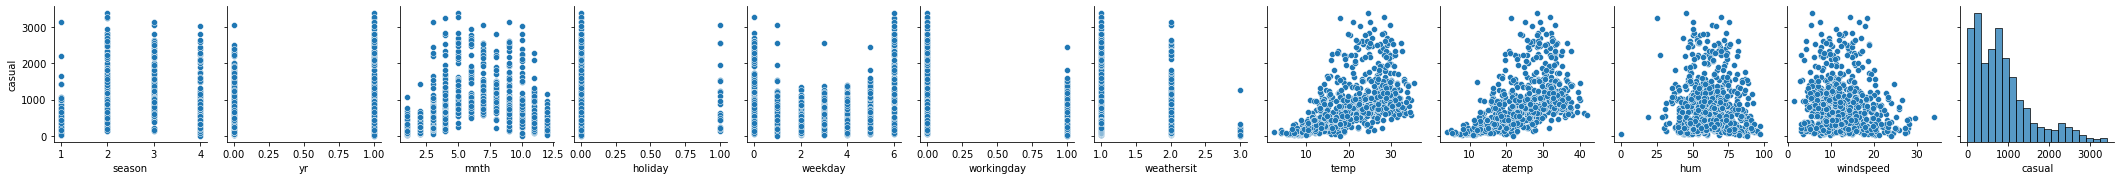

In [11]:
sns.pairplot(bike_cas, y_vars = 'casual')
plt.show()

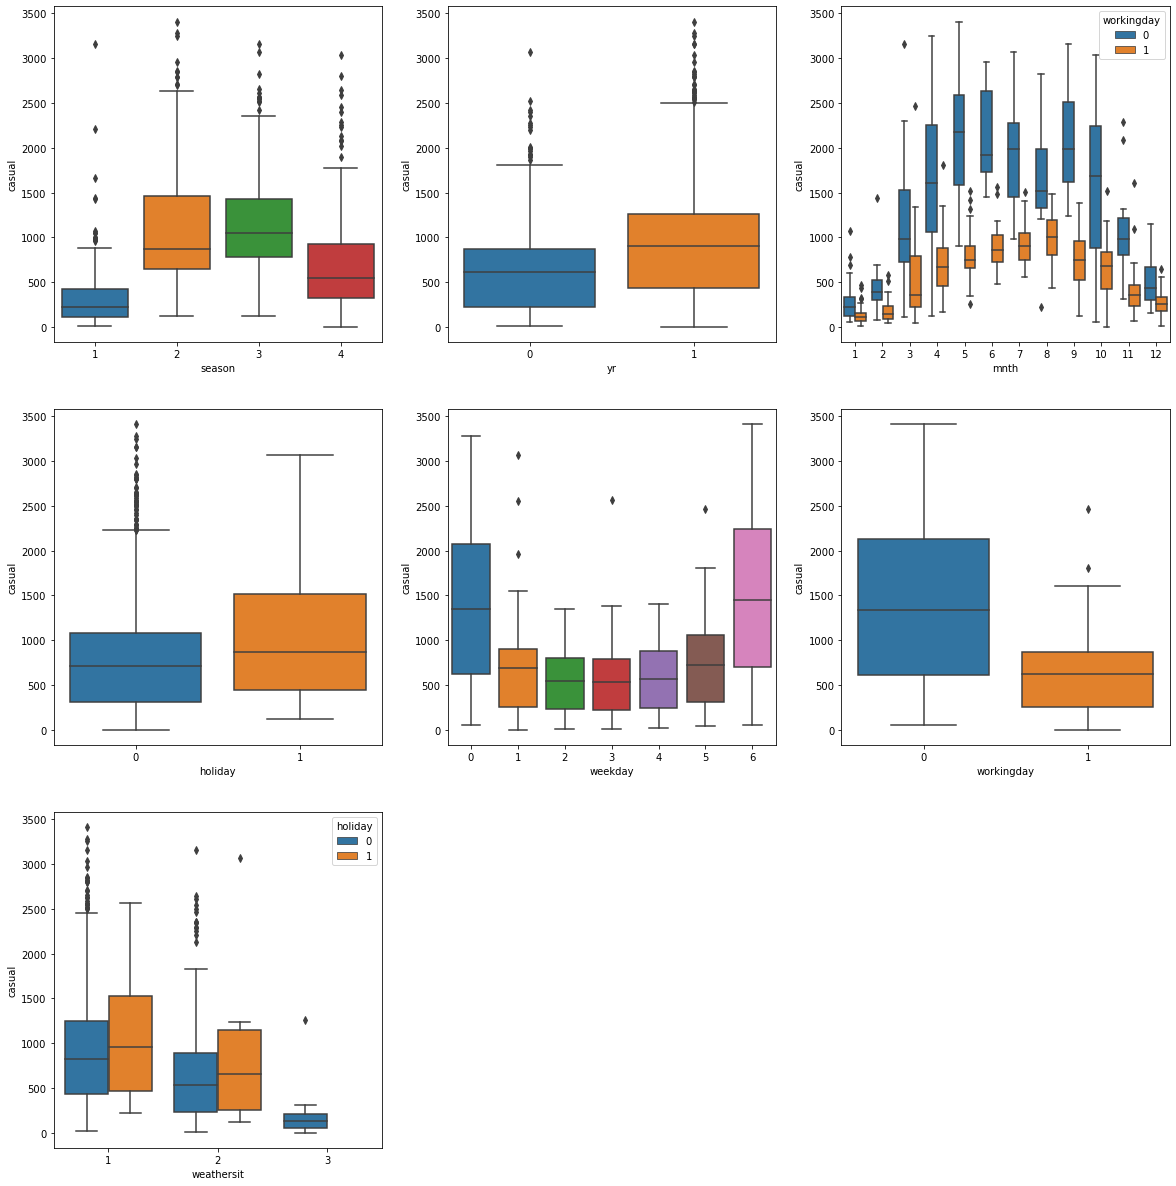

In [12]:
plt.figure(figsize=(20, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'casual', data = bike_cas)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = bike_cas)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'casual', data = bike_cas, hue='workingday')
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'casual', data = bike_cas)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'casual', data = bike_cas)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'casual', data = bike_cas)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'casual', data = bike_cas, hue = 'holiday')
plt.show()

#### Observations for Casual users:
> * Summer season has the highest bookings or the month of June.
> * Year 2019 has the higher number of bookings
> * Higher booking on holiday.
> * Weekends has a higher number of bookings
> * People prefer too book bikes more on a clear day.
> * We can say that temp and atemp shows a linear relationship with the casual users of bikes on that day.
> * And humidity and windspeed is not showing any linear relationship


#### 2. Registered Users

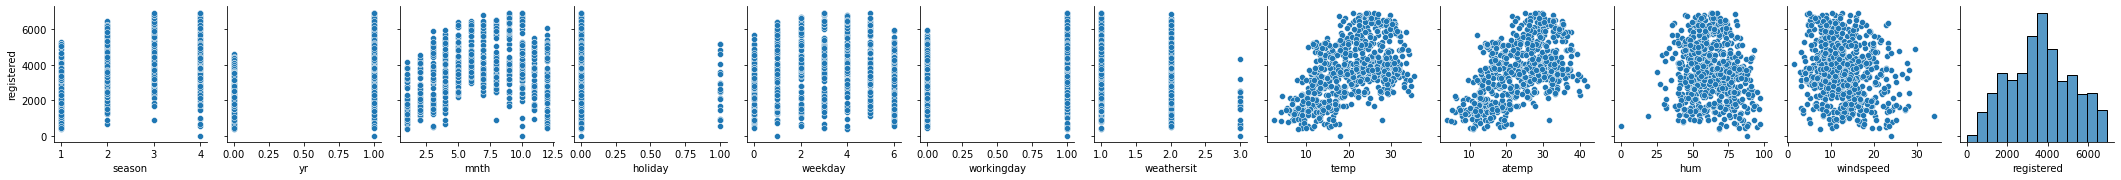

In [13]:
sns.pairplot(bike_reg, y_vars = 'registered')
plt.show()

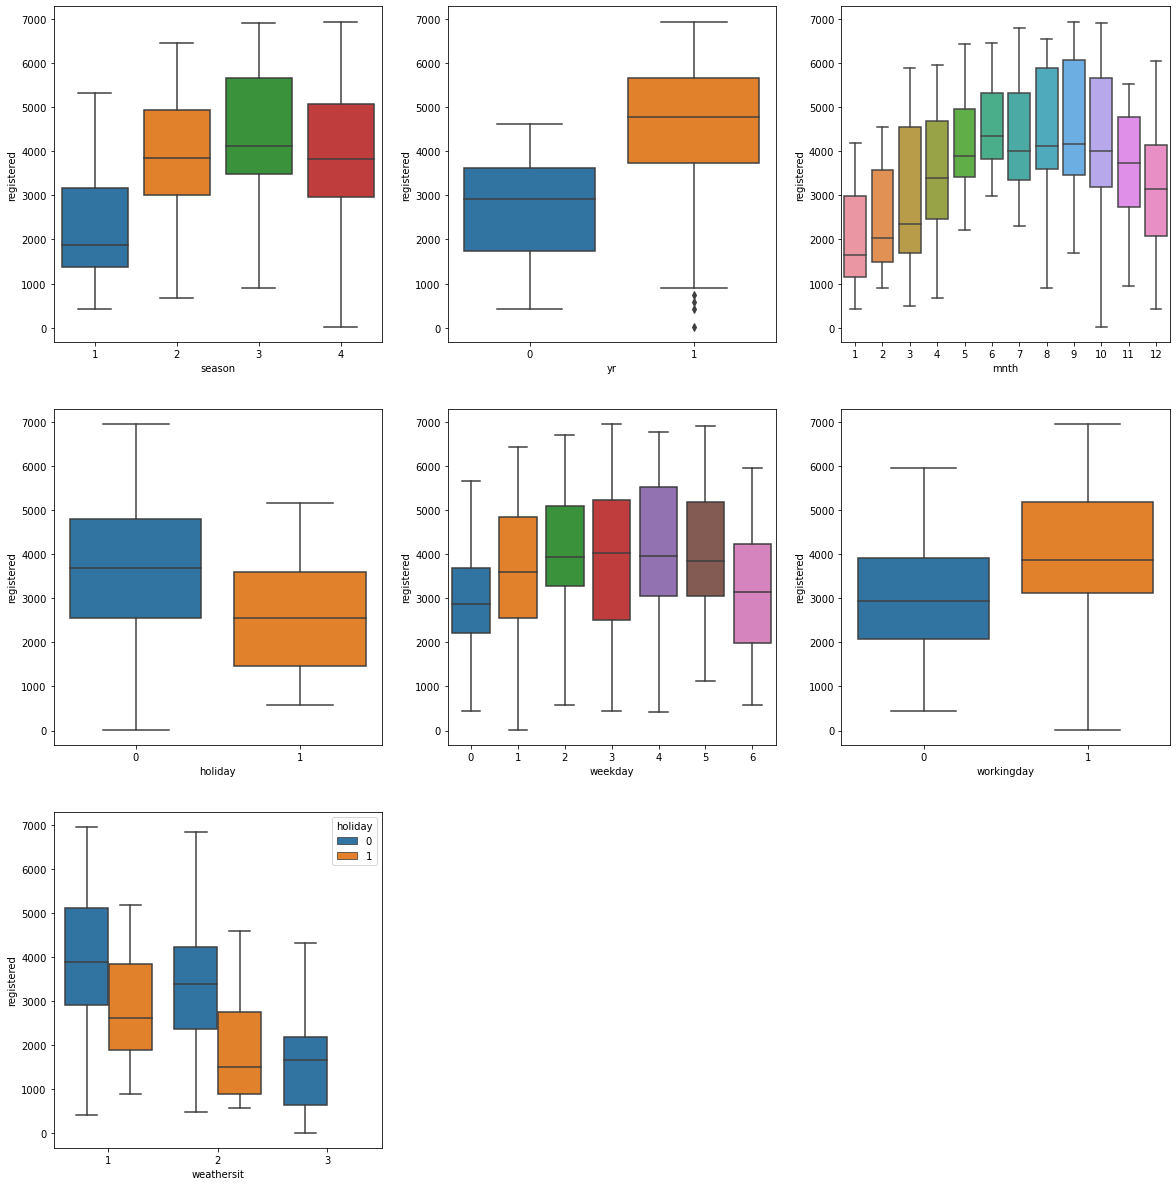

In [14]:
plt.figure(figsize=(20, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'registered', data = bike_reg)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'registered', data = bike_reg)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'registered', data = bike_reg)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'registered', data = bike_reg)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'registered', data = bike_reg)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'registered', data = bike_reg)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'registered', data = bike_reg, hue = 'holiday')
plt.show()

#### Observations for Casual users:
> * Fall season has the highest bookings or the month of September.
> * Year 2019 has a much higher number of bookings
> * Higher booking on a non-holiday.
> * Friday has a highest number of bookings
> * People prefer too book bikes more on a clear day.

#### 3. Total count

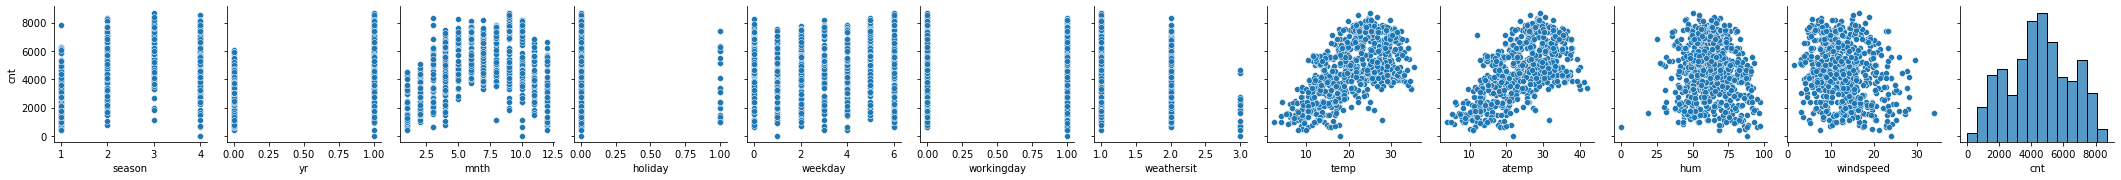

In [15]:
# Total Count
sns.pairplot(bike_cnt, y_vars = 'cnt')
plt.show()

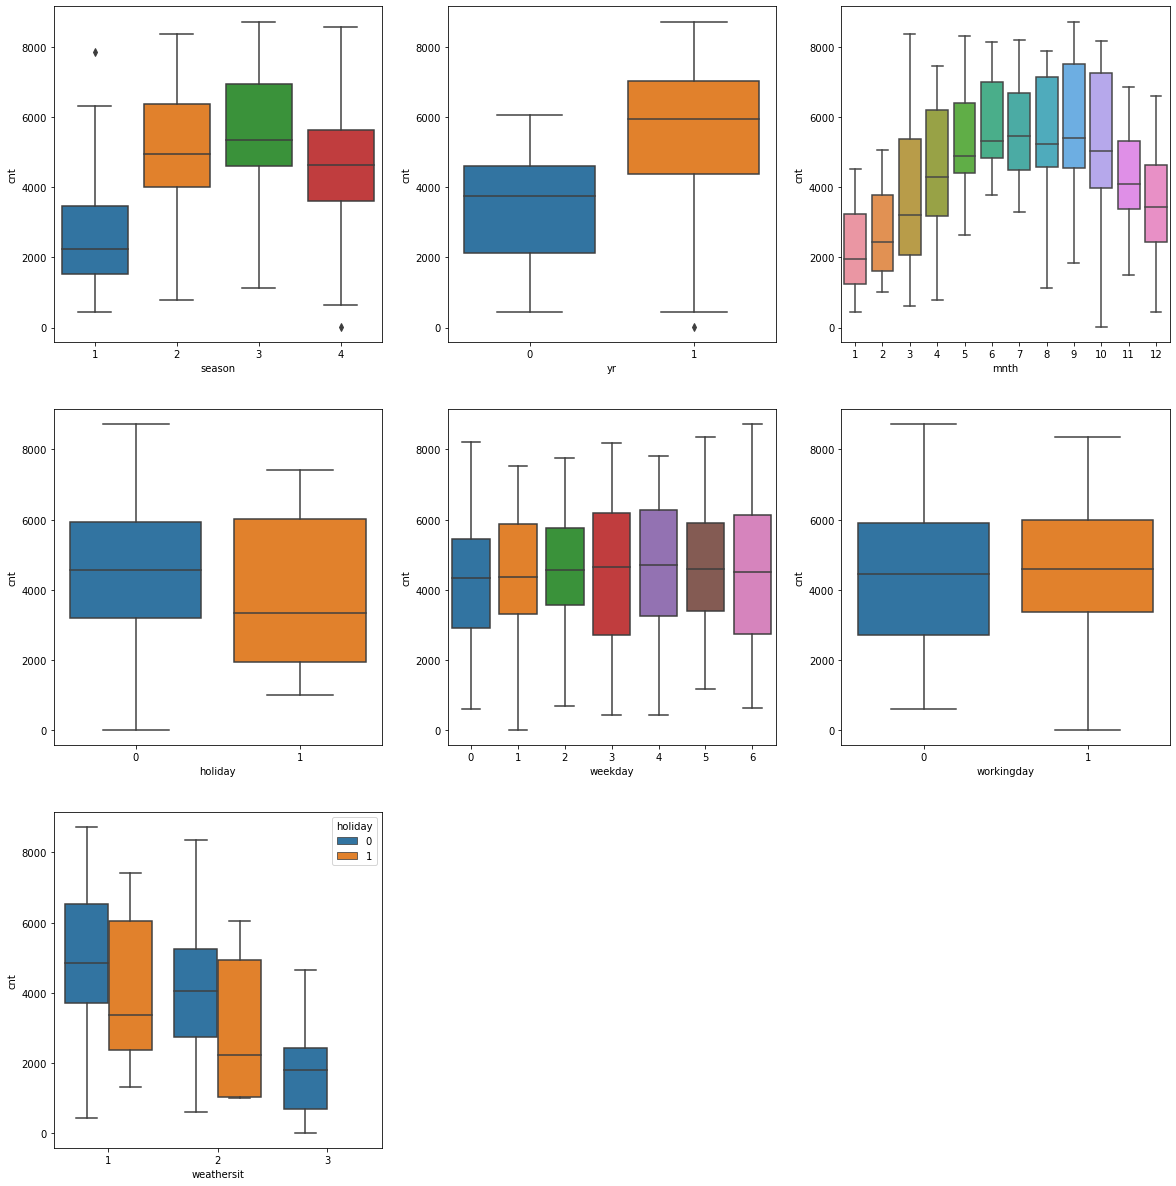

In [16]:
plt.figure(figsize=(20, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_cnt, hue = 'holiday')
plt.show()

#### Observations:
> * Fall season has the highest bookings or the month of sept.
> * Year 2019 has the higher number of bookings
> * Higher booking on non-holiday, for both casual and registered users.
> * Weekends has a higher number of bookings
> * People prefer too book bikes more on a sunny day.
> * We can say that temp and atemp shows a linear relationship with the cnt of bikes on that day.
> * And humidity and windspeed is not showing any linear relationship


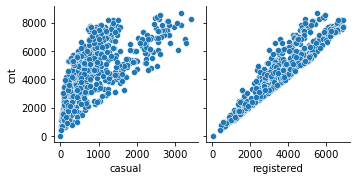

In [17]:
# Since cnt is a sum of casual and registered users, lets see what relaltionship these columns have.
sns.pairplot(bike, y_vars='cnt', x_vars=['casual', 'registered'])
plt.show()

In [18]:
corr = bike_cnt.corr()
corr

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

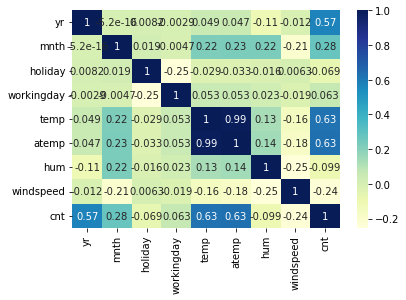

In [19]:
sns.heatmap(corr, cmap='YlGnBu', annot=True)

We can see they have a pretty clear linear relationship

## Prepare data for modelling

Since the column atemp is mostly similar to temp in all aspects, and dteday will not play any important role.
Thus dropping these columns from all datasets

In [20]:
# bike = bike.drop('atemp', axis=1)
bike_features = bike_cnt.drop(['atemp', 'dteday', 'cnt'], axis=1)

In [21]:
bike_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.9+ KB


In [22]:
#Convert few columns to object
cat_col = list(bike_features.select_dtypes(include=['object']))
cat_col

['season', 'weekday', 'weathersit']

In [23]:
bike_features.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
No.,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,80.5833,10.749882
2,1,0,1,0,0,0,2,14.902598,69.6087,16.652113
3,1,0,1,0,1,1,1,8.050924,43.7273,16.636703
4,1,0,1,0,2,1,1,8.200000,59.0435,10.739832
5,1,0,1,0,3,1,1,9.305237,43.6957,12.522300
6,1,0,1,0,4,1,1,8.378268,51.8261,6.000868
7,1,0,1,0,5,1,2,8.057402,49.8696,11.304642
8,1,0,1,0,6,0,2,6.765000,53.5833,17.875868
9,1,0,1,0,0,0,1,5.671653,43.4167,24.250650


#### Creating dummies
Weathersit has 4 level of weather, lets create dummies for this column

In [24]:
bike_features_encoded = pd.get_dummies(bike_features[cat_col], columns=cat_col)

W:\PG\Jupyter_Notebooks\env\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [25]:
bike_features_ready = pd.concat( [bike_features.drop(cat_col, axis=1), bike_features_encoded], axis = 1 )
bike_features_ready

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
No.,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,14.110847,80.5833,10.749882,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,14.902598,69.6087,16.652113,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,1,8.050924,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,1,8.200000,59.0435,10.739832,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,1,0,1,9.305237,43.6957,12.522300,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,1,10.420847,65.2917,23.458911,1,0,0,...,0,0,0,0,1,0,0,0,1,0
727,1,12,0,1,10.386653,59.0000,10.416557,1,0,0,...,0,0,0,0,0,1,0,0,1,0
728,1,12,0,0,10.386653,75.2917,8.333661,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
bike_features_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   mnth          730 non-null    int64  
 2   holiday       730 non-null    int64  
 3   workingday    730 non-null    int64  
 4   temp          730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   season_1      730 non-null    uint8  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  weekday_0     730 non-null    uint8  
 12  weekday_1     730 non-null    uint8  
 13  weekday_2     730 non-null    uint8  
 14  weekday_3     730 non-null    uint8  
 15  weekday_4     730 non-null    uint8  
 16  weekday_5     730 non-null    uint8  
 17  weekday_6     730 non-null    uint8  
 18  weathersit_1  730 non-null    

#### Creating X and y

Will be creating y for casual, registered and total users

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
X = bike_features_ready
y_cnt = bike_cnt['cnt']
y_cas = bike_cas['casual']
y_reg = bike_reg['registered']

#### Rescalling

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
No.,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,14.110847,80.5833,10.749882,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,14.902598,69.6087,16.652113,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,1,8.050924,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,1,8.200000,59.0435,10.739832,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,1,0,1,9.305237,43.6957,12.522300,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [32]:
num_vars = ['temp', 'hum', 'windspeed']
X[num_vars] = scaler.fit_transform(X[num_vars])

In [33]:
X.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
No.,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0.355170,0.828620,0.284606,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0.379232,0.715771,0.466215,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0.171000,0.449638,0.465740,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,1,0.175530,0.607131,0.284297,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,1,0,1,0.209120,0.449313,0.339143,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [34]:
X.describe()

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,0.543852,0.645400,0.346568,0.246575,0.252055,0.257534,...,0.143836,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.634247,0.336986,0.028767
std,0.500343,3.450215,0.167266,0.465405,0.228140,0.146402,0.159873,0.431313,0.434490,0.437576,...,0.351164,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.481971,0.473004,0.167266
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,0.346084,0.534704,0.232045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,1.000000,0.548307,0.643959,0.326928,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,1.000000,0.743261,0.750535,0.434629,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> #### I will perform modelling separately for Casual Users & Registered Users

#### Heatmaps

In [35]:
# Correlation Matrices
cas_cor = pd.concat([X,y_cas], axis=1).corr()
reg_cor = pd.concat([X,y_reg], axis=1).corr()
cnt_cor = pd.concat([X,y_cnt], axis=1).corr()

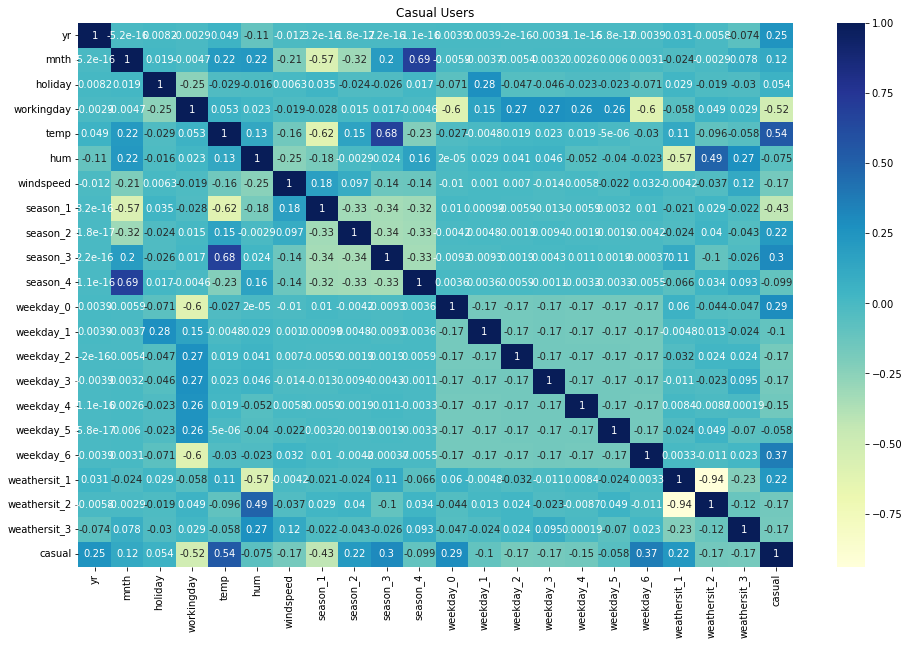

In [36]:
#Casual Users
plt.figure(figsize = (16, 10))
sns.heatmap(cas_cor, annot = True, cmap="YlGnBu")
plt.title('Casual Users')
plt.show()

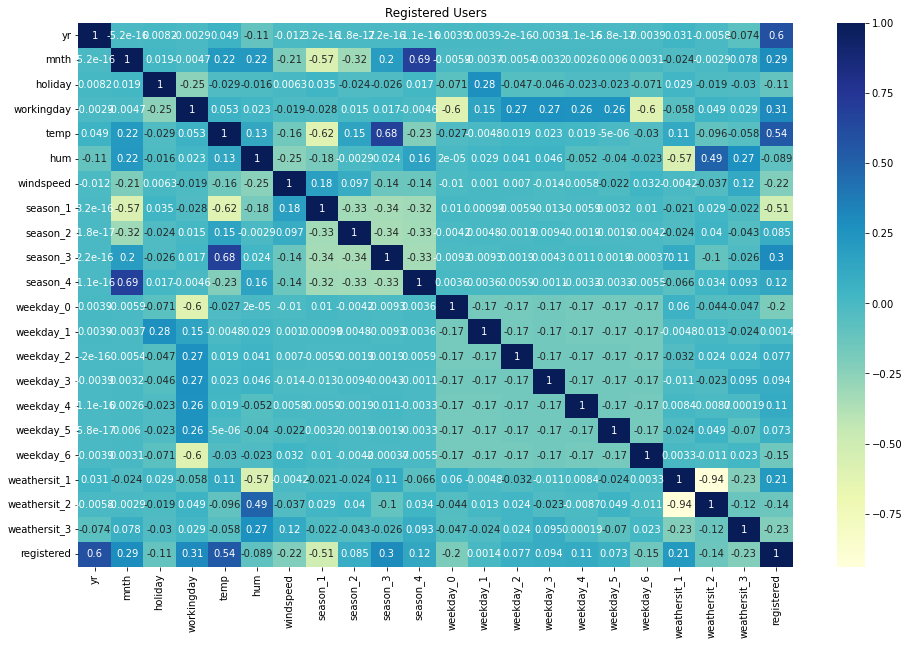

In [37]:
#Registered Users
plt.figure(figsize = (16, 10))
sns.heatmap(reg_cor, annot = True, cmap="YlGnBu", )
plt.title('Registered Users')
plt.show()

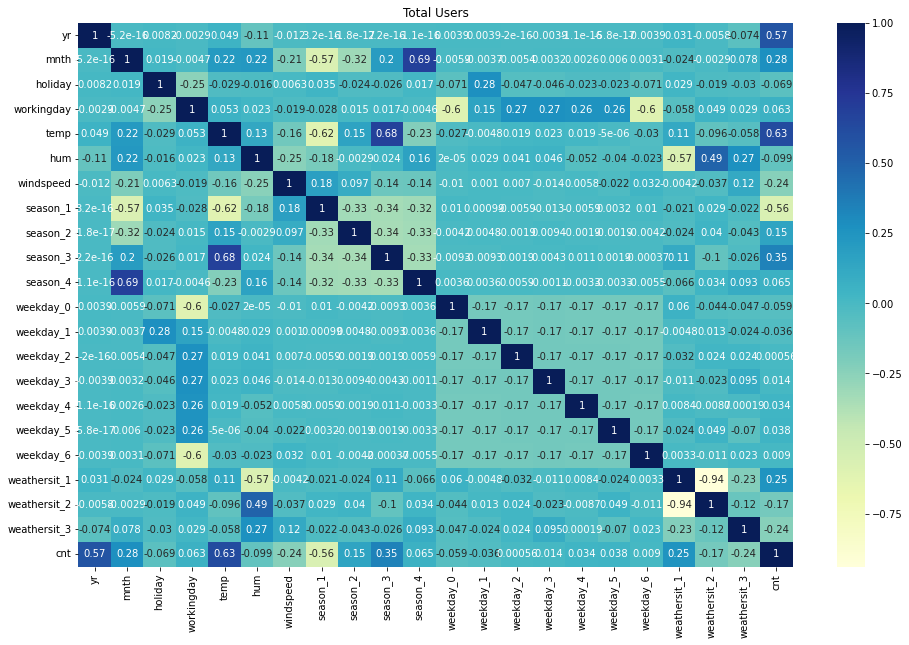

In [38]:
#Total Count
plt.figure(figsize = (16, 10))
sns.heatmap(cnt_cor, annot = True, cmap="YlGnBu")
plt.title('Total Users')
plt.show()

I will first perform modelling for Registered users

### 1) Registered Users

#### Split data into Train and Test data

In [39]:
np.random.seed(0)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, train_size=0.7, random_state=42)

In [40]:
# X_train = X_train.values.reshape(510,1)
X_train

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
No.,,,,,,,,,,,,,,,,,,,,,
646,1,10,1,0,0.403972,0.729648,0.344872,0,0,0,...,0,1,0,0,0,0,0,0,1,0
164,0,6,0,1,0.717562,0.508569,0.583333,0,1,0,...,0,1,0,0,0,0,0,1,0,0
361,0,12,0,1,0.331287,0.784062,0.342338,1,0,0,...,0,0,1,0,0,0,0,0,1,0
641,1,10,0,1,0.745598,0.816195,0.091026,0,0,0,...,0,0,0,1,0,0,0,0,1,0
626,1,9,0,1,0.703024,0.897172,0.691023,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,3,0,0,0.405237,0.542304,0.511703,1,0,0,...,1,0,0,0,0,0,0,1,0,0
107,0,4,0,0,0.495350,0.493144,0.579511,0,1,0,...,1,0,0,0,0,0,0,1,0,0
271,0,9,0,1,0.717562,0.872751,0.260245,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
y_train_reg

No.
646    4604
164    4157
361    1059
641    6844
626    3702
       ... 
72     1435
107    2186
271    3427
436    4460
103    1953
Name: registered, Length: 510, dtype: int64

#### Fitting Model

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [43]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train_reg)

LinearRegression()

In [44]:
y_pred_reg = lm.predict(X_test)

W:\PG\Jupyter_Notebooks\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='registered'>

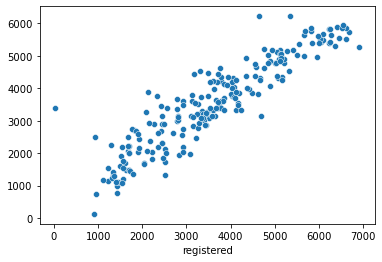

In [45]:
sns.scatterplot(y_test_reg, y_pred_reg)

In [46]:
# R2 Score
cnt_r2_score = r2_score(y_test_reg, y_pred_reg)
cnt_r2_score

0.836590782000326

In [47]:
#Using OLS Model
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train_reg, X_train).fit()
lr.params

const            634.399161
yr              1707.749367
mnth             -25.380601
holiday         -306.115421
workingday       870.895377
temp            2639.247687
hum             -576.996574
windspeed       -776.206146
season_1        -661.919993
season_2         197.886128
season_3         187.692435
season_4         910.740592
weekday_0        -81.074541
weekday_1         34.607812
weekday_2         41.509490
weekday_3        217.384667
weekday_4        200.052227
weekday_5         71.225759
weekday_6        150.693747
weathersit_1     858.836708
weathersit_2     492.033054
weathersit_3    -716.470601
dtype: float64

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     147.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.59e-180
Time:                        19:48:46   Log-Likelihood:                -4016.6
No. Observations:                 510   AIC:                             8069.
Df Residuals:                     492   BIC:                             8145.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          634.3992    150.879      4.205   

### VIF    

In [49]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

W:\PG\Jupyter_Notebooks\env\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
W:\PG\Jupyter_Notebooks\env\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
11,season_4,inf
12,weekday_0,inf
20,weathersit_2,inf
19,weathersit_1,inf
18,weekday_6,inf
17,weekday_5,inf
16,weekday_4,inf
15,weekday_3,inf
14,weekday_2,inf
13,weekday_1,inf


VIF shows inf value for some features, which means a perfect multi colinearity can be seen.

But instead of using VIF as feature elimination technique i will use Recursive Feature Elimination (RFE)

### RFE - Registered

In [50]:
rfe = RFE(lm,step=10)
rfe = rfe.fit(X_train, y_train_reg)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 3),
 ('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_1', True, 1),
 ('season_2', False, 3),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('weekday_0', False, 2),
 ('weekday_1', False, 3),
 ('weekday_2', False, 3),
 ('weekday_3', False, 3),
 ('weekday_4', False, 3),
 ('weekday_5', False, 3),
 ('weekday_6', False, 3),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [52]:
rfe_sel_col = X_train.columns[rfe.support_]
rfe_sel_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_1',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [53]:
rfe_elm_col = list(X_train.columns[~rfe.support_])
rfe_elm_col

['const',
 'mnth',
 'season_2',
 'season_3',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

### Fit model again

In [54]:
#new dataset after eliminated columns
X_train_rfe = X_train[rfe_sel_col]

In [55]:
lm = sm.OLS(y_train_reg, X_train_rfe).fit()   # Running the linear model

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.1
Date:                Thu, 04 May 2023   Prob (F-statistic):          9.71e-186
Time:                        19:48:47   Log-Likelihood:                -4023.3
No. Observations:                 510   AIC:                             8069.
Df Residuals:                     499   BIC:                             8115.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr            1699.9144     58.646     28.986   

As per above summary and looking at P values we can remove 2 features.
- Holiday
- Hum
- Weathersit_3

In [57]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_1',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [58]:
X_train_new_reg = X_train_rfe.drop(['holiday', 'hum', 'weathersit_3'], axis=1)

In [59]:
lm = sm.OLS(y_train_reg, X_train_new_reg).fit()   # Running the linear model

print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:             registered   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2306.
Date:                Thu, 04 May 2023   Prob (F-statistic):                        0.00
Time:                        19:48:47   Log-Likelihood:                         -4029.3
No. Observations:                 510   AIC:                                      8075.
Df Residuals:                     502   BIC:                                      8109.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [60]:
# Thus all features removed for Registered users
rfe_elm_col.extend(['holiday', 'hum', 'weathersit_3'])
rfe_elm_col = rfe_elm_col[1:]
rfe_elm_col

['mnth',
 'season_2',
 'season_3',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'holiday',
 'hum',
 'weathersit_3']

In [62]:
lm = LinearRegression()
lm.fit(X_train_new_reg, y_train_reg)
# get the coefficients of the features
coef = pd.DataFrame(lm.coef_, index=X_train_new_reg.columns, columns=['Coefficients'])

# take absolute values of the coefficients
coef['Abs_Coefficients'] = np.abs(coef['Coefficients'])

# sort the absolute coefficient values in descending order
coef = coef.sort_values(by='Abs_Coefficients', ascending=False)

# select the top 3 features with the highest absolute coefficient values
top_features = coef.index[:3].tolist()

print("Top 3 features contributing the most: ", top_features)

Top 3 features contributing the most:  ['temp', 'yr', 'weathersit_1']


### Residual Analysis

In [63]:
X_test_new = X_test.drop(rfe_elm_col, axis=1)
#Y Predictions
y_pred_reg = lm.predict(X_test_new)

In [64]:
reg_r2 = r2_score(y_test_reg, y_pred_reg)
reg_r2

0.8269428495987571

W:\PG\Jupyter_Notebooks\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='registered'>

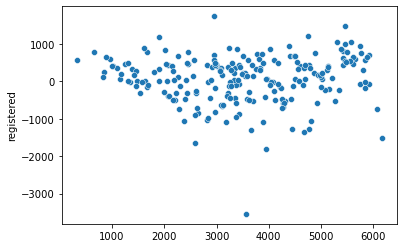

In [65]:
y_resd_reg = y_test_reg - y_pred_reg
sns.scatterplot(y_pred_reg, y_resd_reg)

W:\PG\Jupyter_Notebooks\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

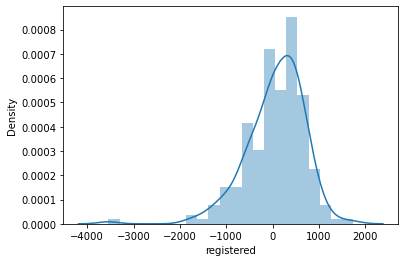

In [66]:
sns.distplot(y_resd_reg)

Lets try to fit the model with final features and predict casual users.

In [68]:
reg_selected_features = X_train_new_reg.columns
reg_selected_features

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_1', 'season_4',
       'weathersit_1', 'weathersit_2'],
      dtype='object')

### 2) Casual Users

In [69]:
np.random.seed(0)
X_train, X_test, y_train_cas, y_test_cas = train_test_split(X, y_cas, train_size=0.7, random_state=42)

#### Fitting Model

In [70]:
X_train = sm.add_constant(X_train)
lr_cas = sm.OLS(y_train_cas, X_train).fit()

In [71]:
print(lr_cas.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     71.00
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.12e-120
Time:                        20:11:03   Log-Likelihood:                -3728.1
No. Observations:                 510   AIC:                             7492.
Df Residuals:                     492   BIC:                             7568.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          352.9739     85.699      4.119   

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

W:\PG\Jupyter_Notebooks\env\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
W:\PG\Jupyter_Notebooks\env\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
11,season_4,inf
12,weekday_0,inf
20,weathersit_2,inf
19,weathersit_1,inf
18,weekday_6,inf
17,weekday_5,inf
16,weekday_4,inf
15,weekday_3,inf
14,weekday_2,inf
13,weekday_1,inf


#### RFE - Casual

In [73]:
lm_cas = LinearRegression()
lm_cas.fit(X_train, y_train_cas)
rfe_cas = RFE(lm_cas,step=10)
rfe_cas = rfe_cas.fit(X_train, y_train_cas)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('const', False, 3),
 ('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_1', True, 1),
 ('season_2', False, 3),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('weekday_0', False, 2),
 ('weekday_1', False, 3),
 ('weekday_2', False, 3),
 ('weekday_3', False, 3),
 ('weekday_4', False, 3),
 ('weekday_5', False, 3),
 ('weekday_6', False, 3),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [74]:
rfe_sel_col = X_train.columns[rfe_cas.support_]
rfe_elm_col = list(X_train.columns[~rfe_cas.support_])[1:]

In [75]:
print(rfe_sel_col)
print(rfe_elm_col)

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2',
       'weekday_0', 'weekday_2', 'weekday_6', 'weathersit_3'],
      dtype='object')
['mnth', 'holiday', 'season_3', 'season_4', 'weekday_1', 'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_1', 'weathersit_2']


#### Train Model Again

In [76]:
X_train_rfe = X_train[rfe_sel_col]
lr_cas = sm.OLS(y_train_cas, X_train_rfe).fit()
print(lr_cas.summary())

                                 OLS Regression Results                                
Dep. Variable:                 casual   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              326.0
Date:                Thu, 04 May 2023   Prob (F-statistic):                   1.02e-219
Time:                        20:11:15   Log-Likelihood:                         -3755.0
No. Observations:                 510   AIC:                                      7532.
Df Residuals:                     499   BIC:                                      7579.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [77]:
#Lets drop weekday_2
X_train_cas_new = X_train_rfe.drop(['weekday_2'], axis = 1)
lr_cas = sm.OLS(y_train_cas, X_train_cas_new).fit()
print(lr_cas.summary())

                                 OLS Regression Results                                
Dep. Variable:                 casual   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              357.5
Date:                Thu, 04 May 2023   Prob (F-statistic):                   1.62e-220
Time:                        20:11:41   Log-Likelihood:                         -3756.2
No. Observations:                 510   AIC:                                      7532.
Df Residuals:                     500   BIC:                                      7575.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [78]:
#Lets drop workingday
X_train_cas_new = X_train_cas_new.drop(['workingday'], axis = 1)
lr_cas = sm.OLS(y_train_cas, X_train_cas_new).fit()
print(lr_cas.summary())

                                 OLS Regression Results                                
Dep. Variable:                 casual   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              394.5
Date:                Thu, 04 May 2023   Prob (F-statistic):                   5.50e-221
Time:                        20:11:43   Log-Likelihood:                         -3758.2
No. Observations:                 510   AIC:                                      7534.
Df Residuals:                     501   BIC:                                      7572.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [80]:
lm_cas = LinearRegression()
lm_cas.fit(X_train_cas_new, y_train_cas)

# get the coefficients of the features
coef = pd.DataFrame(lm_cas.coef_, index=X_train_cas_new.columns, columns=['Coefficients'])

# take absolute values of the coefficients
coef['Abs_Coefficients'] = np.abs(coef['Coefficients'])

# sort the absolute coefficient values in descending order
coef = coef.sort_values(by='Abs_Coefficients', ascending=False)

# select the top 3 features with the highest absolute coefficient values
top_features = coef.index[:3].tolist()

print("Top 3 features contributing the most: ", top_features)

Top 3 features contributing the most:  ['temp', 'weekday_6', 'weekday_0']


In [81]:
list(X_train_cas_new.columns)

['yr',
 'temp',
 'hum',
 'windspeed',
 'season_1',
 'season_2',
 'weekday_0',
 'weekday_6',
 'weathersit_3']

In [82]:
X_test_cas_new = X_test[list(X_train_cas_new.columns)]
y_pred_cas = lm_cas.predict(X_test_cas_new)

W:\PG\Jupyter_Notebooks\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='casual'>

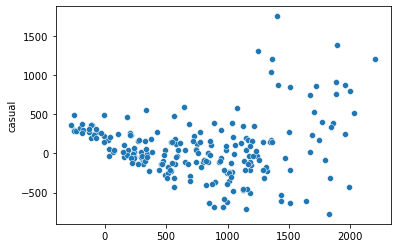

In [83]:
y_resid_cas = y_test_cas - y_pred_cas
sns.scatterplot(y_pred_cas, y_resid_cas)

W:\PG\Jupyter_Notebooks\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

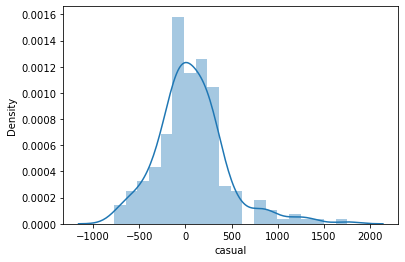

In [84]:
sns.distplot(y_resid_cas)

In [ ]:
# # R2 Score
cas_r2_score = r2_score(y_test_cas, y_pred_cas)
cas_r2_score

As we can see from the residual plots error terms are randomly distributed.

Thus we have predicted Casual and registered users from the given dataset seperately using Linear Regression model